In [234]:
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive visualization
import plotly.express as px
import plotly.graph_objects as go

# For data pre-processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# For imputing missing values
from sklearn.impute import SimpleImputer

# For imputing missing values using Iterative-Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Models for classification task
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestRegressor
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# impot Pipeline
from sklearn.pipeline import Pipeline

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [235]:
df = pd.read_csv('heart_disease_uci.csv')

In [236]:
df.head(6)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [238]:
# Statistics Summary of the data
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


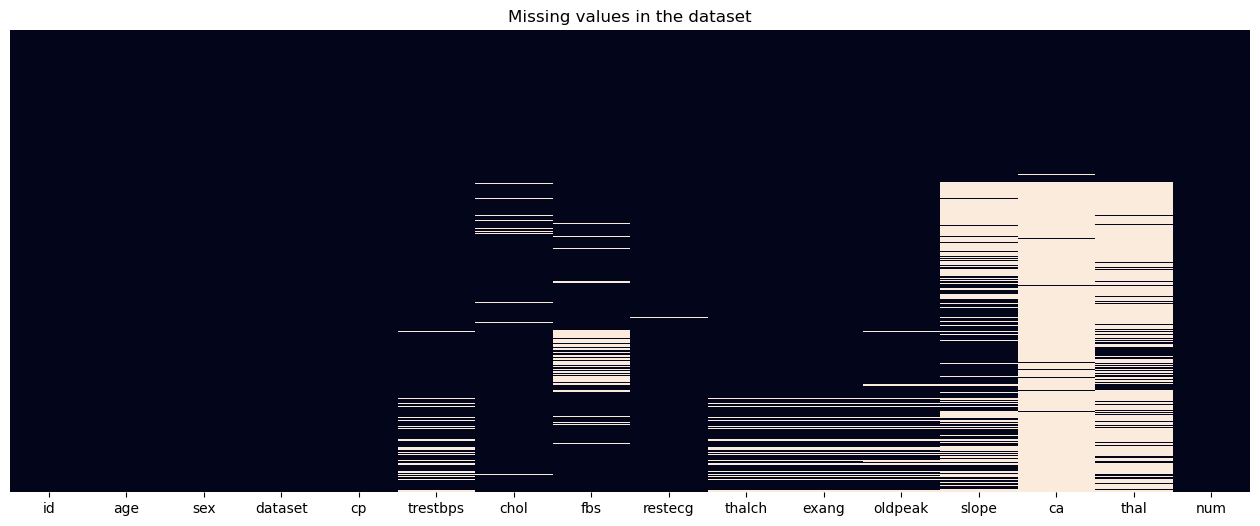

In [239]:
# Let's check missing values in heatmap
plt.figure(figsize = (16, 6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
plt.title("Missing values in the dataset")
plt.show()

In [240]:
# Let's check the percentage of missing values in each column
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
thalch       5.98
exang        5.98
chol         3.26
restecg      0.22
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
num          0.00
dtype: float64

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [242]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [243]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [244]:
# Function for imputing missing values that are less than 10%

missing_threshold = 10  # 10% threshold for missing values
total_entries = len(df)
target_variable = 'num'

# list of numerical columns that have less than a certain threshold of missing values and are not the target variable.
numerical_cols = []
for col in df.columns:
    if (df[col].dtype in ['int64', 'float64'] and
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold and
        col != target_variable):
        numerical_cols.append(col)


# list of numerical columns that have less than a certain threshold of missing values
categorical_cols = []
for col in df.columns:
    if (df[col].dtype == 'object' and
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold):
        categorical_cols.append(col)


# Apply simple imputation to numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to numerical and categorical columns
for col in numerical_cols:
    df.loc[:,col] = num_imputer.fit_transform(df[[col]])

for col in categorical_cols:
    df.loc[:, col] = cat_imputer.fit_transform(df[[col]])

# Confirm there are no missing values left

missing_values_sum = df[df.columns.difference(['thal', 'ca', 'slope'])].isnull().sum()

print(f"The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:\n{missing_values_sum}"  + "\n")

# Display the features with missing values 
print(f"The sum of all high missing values where simple imputation wasn't used, is:\n{df[['thal', 'ca', 'slope']].isnull().sum()}")

The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:
age         0
chol        0
cp          0
dataset     0
exang       0
fbs         0
id          0
num         0
oldpeak     0
restecg     0
sex         0
thalch      0
trestbps    0
dtype: int64

The sum of all high missing values where simple imputation wasn't used, is:
thal     486
ca       611
slope    309
dtype: int64


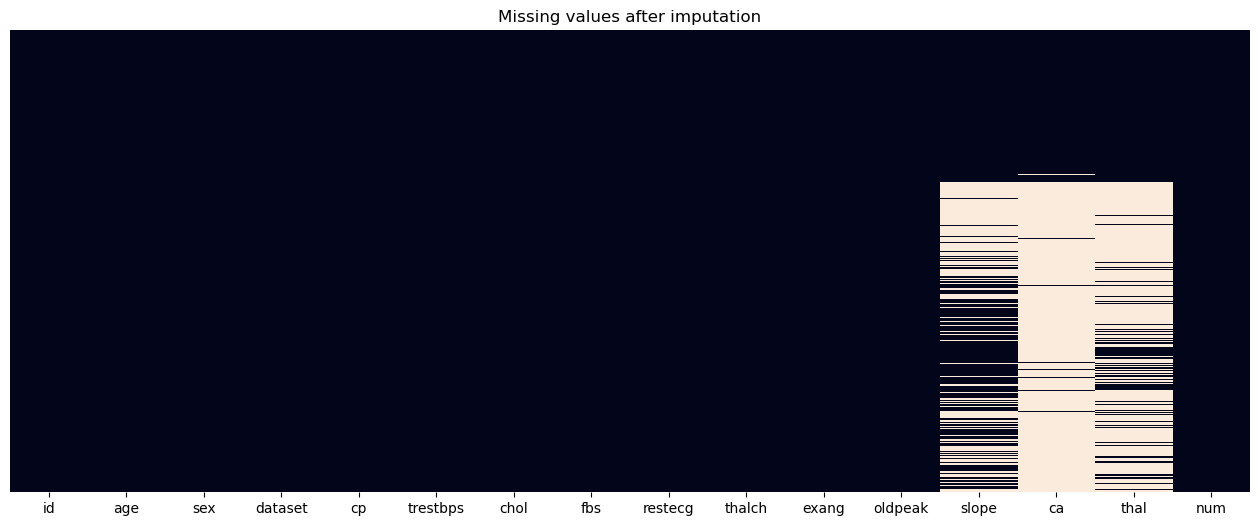

In [245]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels = False)
plt.title('Missing values after imputation')
plt.show()

In [246]:
#Currently, only three variables remain with a substantial proportion of missing values. To address this, 
#I will employ the Random Forest algorithm to estimate the missing data.

# Split the dataset into two subset with one contaning complete data and the other containing missing data for thal, ca, and slope. these dataset should still have all the columns in the result.
# Create a new dataframe which removes all the rows that nan values
df_clean = df.dropna()

# Create a new dataframe which contains all the rows that have missing values
df_missing = df[df.isna().any(axis=1)]

print(f"The shape of the complete dataframe is: {df_clean.shape}")
print("\n")
print(f"The shape of the dataframe with missing values is: {df_missing.shape}")

The shape of the complete dataframe is: (299, 16)


The shape of the dataframe with missing values is: (621, 16)


In [247]:
#Using RandomForest Algorithm for imputing missing values that are larger in number
# Training and evaluating the model for the target variables 'slope', 'thanl', and 'ca'.
def predict_and_evaluate(target_variable, drop_columns):
    # Drop specified columns from the DataFrame
    X = df_clean.drop(drop_columns, axis=1)
    
    # Select target variable(s)
    y = df_clean[target_variable]

    # Initialize LabelEncoder
    le = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize RandomForestClassifier
    model = RandomForestClassifier(n_estimators=10, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Print accuracy score
    print(f"The accuracy of the model is: {round(accuracy_score(y_test, y_pred),2)}")

    # Print classification report
    print(f"Classification report:\n {classification_report(y_test, y_pred)}")

    # Return the trained model
    return model

In [248]:
# Train and evaluate a model for predicting the 'slope' feature, excluding 'slope', 'ca', and 'thal' from the input features.
rf_model_slope  = predict_and_evaluate('slope', ['slope', 'ca', 'thal'])

The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

 downsloping       0.00      0.00      0.00         3
        flat       0.70      0.76      0.73        25
   upsloping       0.75      0.75      0.75        32

    accuracy                           0.72        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.69      0.72      0.70        60



In [249]:
# Train and evaluate a model for predicting the 'ca' feature, excluding 'ca', and 'thal' from the input features.
rf_model_ca = predict_and_evaluate('ca', [ 'ca', 'thal'])

The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.97      0.86        40
         1.0       0.67      0.15      0.25        13
         2.0       0.33      0.40      0.36         5
         3.0       0.00      0.00      0.00         2

    accuracy                           0.72        60
   macro avg       0.44      0.38      0.37        60
weighted avg       0.68      0.72      0.66        60



In [250]:
#Train and evaluate a model for predicting the 'thal' feature.
rf_model_thal = predict_and_evaluate('thal', ['thal'])

The accuracy of the model is: 0.7
Classification report:
                    precision    recall  f1-score   support

     fixed defect       0.00      0.00      0.00         4
           normal       0.67      0.94      0.78        31
reversable defect       0.76      0.52      0.62        25

         accuracy                           0.70        60
        macro avg       0.48      0.49      0.47        60
     weighted avg       0.67      0.70      0.66        60



In [251]:
# create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['slope', 'ca', 'thal'], axis=1)

# Encode categorical features and predict the missing values
def encode_and_predict(df, target_variable, model):

    # Initialize label encoder
    le = LabelEncoder()

    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    df[target_variable] = model.predict(df)

# Encode categorical features and predict the 'slope' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'slope', rf_model_slope)
# Update the 'slope' column in df_missing with the predicted values
df_missing.loc[:,'slope'] = df_encoded_pred['slope']

# Create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['ca', 'thal'], axis=1)
# Encode categorical features and predict the 'ca' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'ca', rf_model_ca)
# Update the 'ca' column in df_missing with the predicted values
df_missing.loc[:, 'ca'] = df_encoded_pred['ca']

# Create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['thal'], axis=1)
# Encode categorical features and predict the 'thal' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'thal', rf_model_thal)
# Update the 'thal' column in df_missing with the predicted values
df_missing.loc[:, 'thal'] = df_encoded_pred['thal']

In [252]:
df = pd.concat([df_clean, df_missing])

print(f"The shape of the dataset is: {df.shape[0]} rows and {df.shape[1]} columns.")

The shape of the dataset is: 920 rows and 16 columns.


In [253]:
if df.isnull().sum().sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

There are no missing values in the dataset.


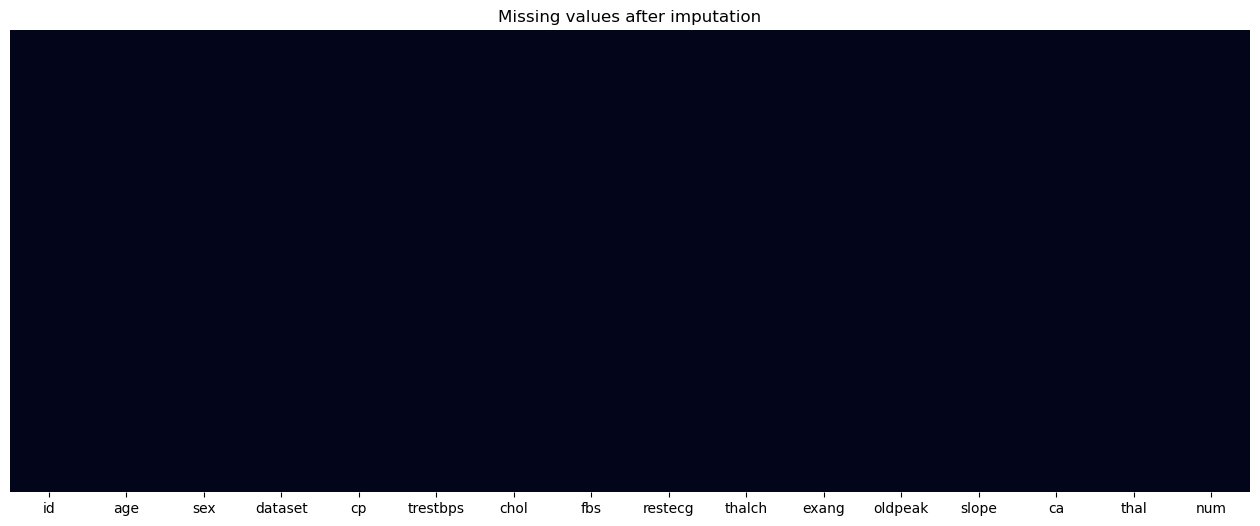

In [254]:
# Create a heatmap for df to check missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels = False)
plt.title('Missing values after imputation')
plt.show()

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(7), int64(1), object(6)
memory usage: 109.6+ KB


In [256]:
df.duplicated().sum()

0

In [257]:
#EDA

In [258]:
#1. age Column
# Let's check the min and max age 
df['age'].min(), df['age'].max()

print(f"The minimum age is: {df['age'].min()}")
print(f"The maximun age is: {df['age'].max()}")

The minimum age is: 28.0
The maximun age is: 77.0


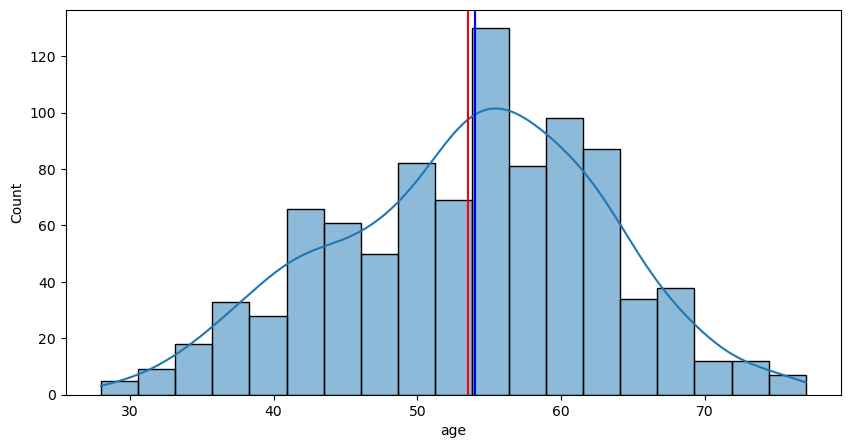

Mean: 53.51086956521739
Median: 54.0
Mode: 54.0


In [259]:
# Let's check the distribution of age column and plot mean, median and mode using seaborn liberary
plt.figure(figsize = (10, 5)) 

sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')
plt.show()

# Print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

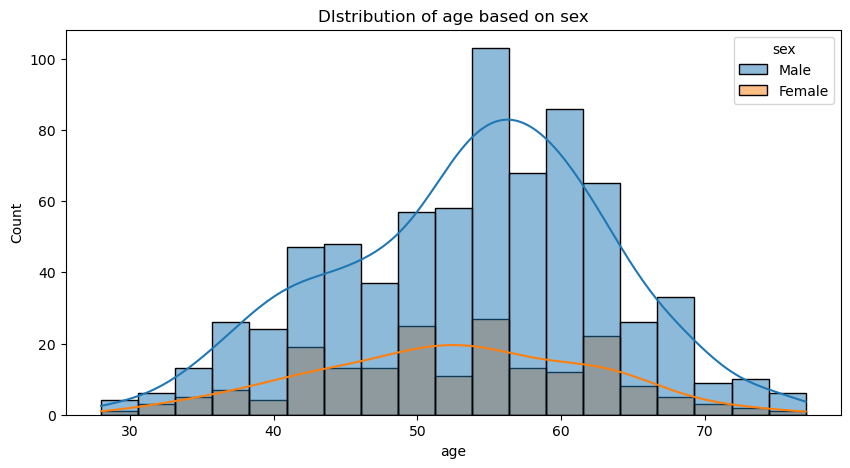

In [260]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = df['age'], hue = 'sex',kde = True)
plt.title('DIstribution of age based on sex')
plt.show()

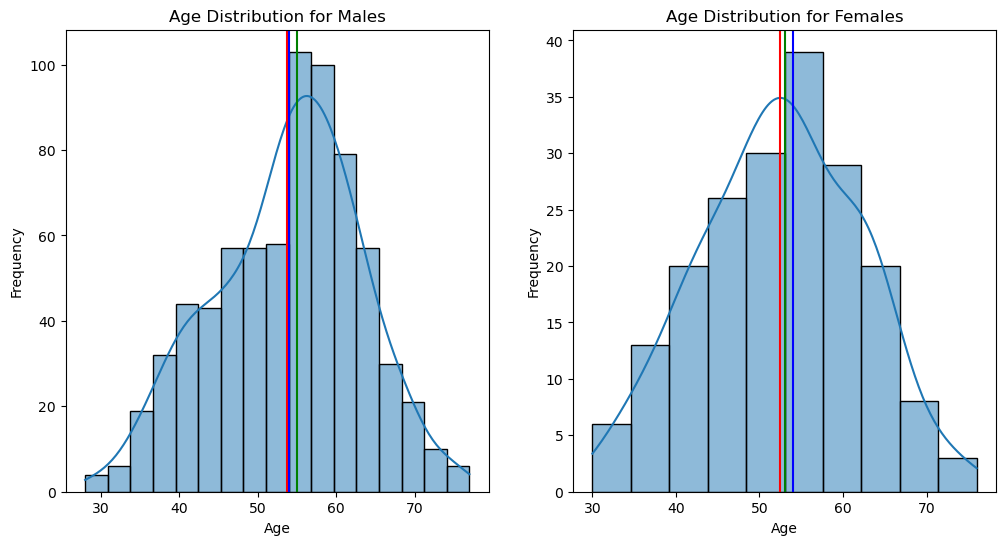

Mean age of Males: 53.78787878787879
Median age of Males: 55.0
Mode age of Males: 54.0
----------------------------------------------------
Mean age of Females: 52.47422680412371
Median age of Females: 53.0
Mode age of Females: 54.0


In [261]:
# Let's see the mean, median, mode of ages based on male and female seperately
# First extract the gender 
males = df[df['sex'] == 'Male']
females = df[df['sex'] == 'Female']

plt.figure(figsize=(12, 6))

# Plot the age distribution for males and also plot the mean, median and mode for males age
plt.subplot(1, 2, 1)
sns.histplot(males['age'], kde = True)
plt.title('Age Distribution for Males')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(males['age'].mean(), color='red')
plt.axvline(males['age'].median(), color='green')
plt.axvline(males['age'].mode()[0], color='blue')

# Plot the age distribution for females
plt.subplot(1, 2, 2)
sns.histplot(females['age'], kde=True)
plt.title('Age Distribution for Females')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(females['age'].mean(), color='red')
plt.axvline(females['age'].median(), color='green')
plt.axvline(females['age'].mode()[0], color='blue')

plt.show()

# Print the value of mean, median and mode of age column based on gender
print('Mean age of Males:', males['age'].mean())
print('Median age of Males:', males['age'].median())
print('Mode age of Males:', males['age'].mode()[0])

print('----------------------------------------------------')

print('Mean age of Females:', females['age'].mean())
print('Median age of Females:', females['age'].median())
print('Mode age of Females:', females['age'].mode()[0])

<function matplotlib.pyplot.show(close=None, block=None)>

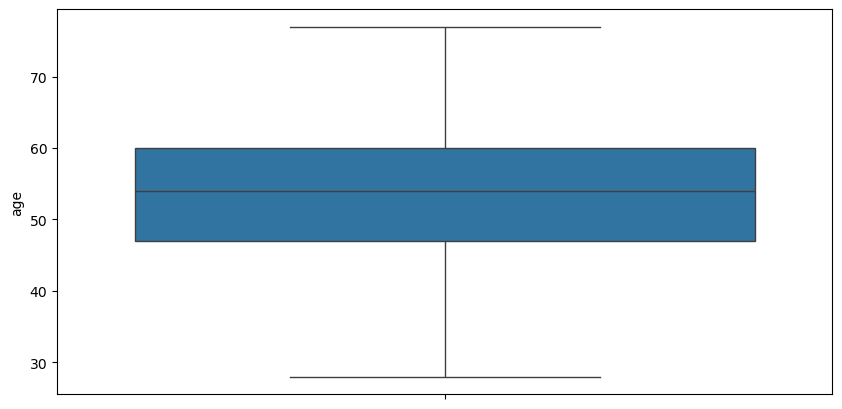

In [262]:
# Let's check outliers in the age column
plt.figure(figsize=(10, 5))
sns.boxplot(df, y = df['age'])
plt.show

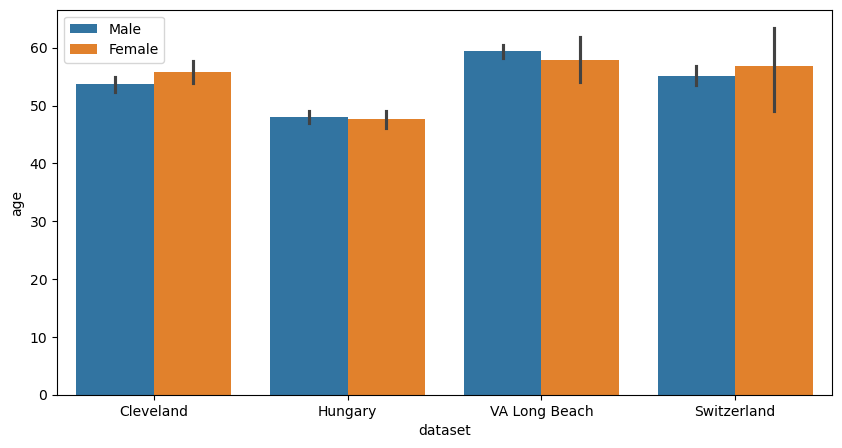

In [263]:
# Let's explore age column based on dataset
plt.figure(figsize=(10, 5))

sns.barplot(df, x = df['dataset'], y = df['age'], hue= 'sex')
plt.legend(loc = 'upper left')
plt.show()

<Axes: xlabel='cp', ylabel='age'>

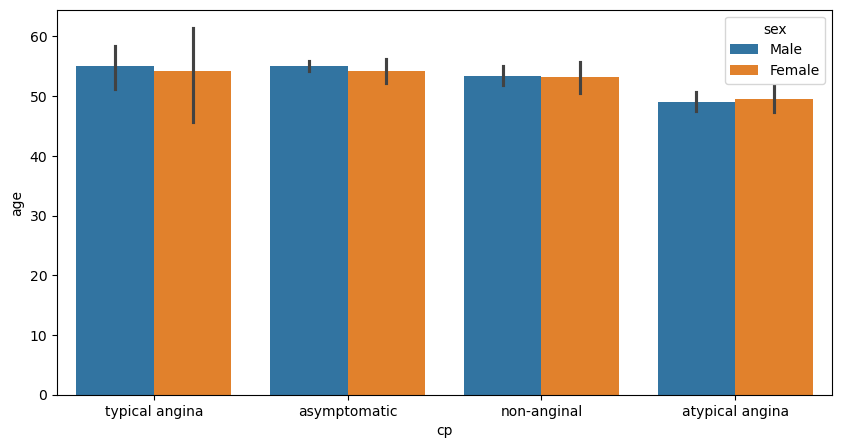

In [264]:
# Let's see how cp type according to age
plt.figure(figsize=(10, 5))

sns.barplot(df, x = df['cp'], y = df['age'], hue='sex')

In [265]:
#2. sex Column ,# Let's see the value counts of males and females
df['sex'].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

In [266]:
#Let,s check percentages of male and female in the data
round(df['sex'].value_counts() / len(df) * 100, 2)

Male      78.91
Female    21.09
Name: sex, dtype: float64

In [267]:
# Let,s check how many percennt males are greater than females
male_count = 726
female_count = 194
total_count = male_count + female_count

# Difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Males are 274.23% more than females in the data.


In [268]:
color = ["#33FF57"]
fig = px.histogram(df, x = df['sex'], color_discrete_sequence=color)
fig.show()

In [269]:
#3. dataset Column ,Let's groupby dataset on the based of gender
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: dataset, dtype: int64

In [270]:
# Make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')


# Print the mean median and mode of age column grouped by dataset column
print(f"Mean of Data Set: \n {df.groupby('dataset')['age'].mean()}")

print(f"Median of Data Set: \n {df.groupby('dataset')['age'].median()}")

print(f"Mode of Data Set: \n {df.groupby('dataset')['age'].agg(pd.Series.mode)}")


fig.show()

Mean of Data Set: 
 dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
Median of Data Set: 
 dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
Mode of Data Set: 
 dataset
Cleveland                58.0
Hungary                  54.0
Switzerland              61.0
VA Long Beach    [62.0, 63.0]
Name: age, dtype: object


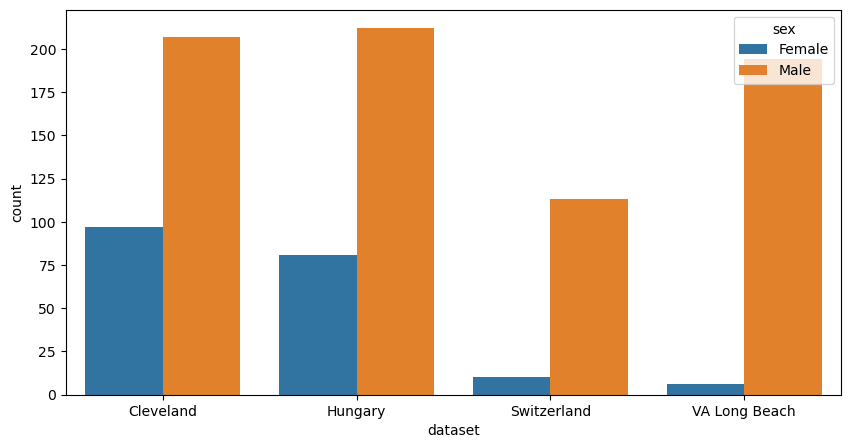

In [271]:
plt.figure(figsize=(10,5))
sns.barplot(df.groupby('sex')['dataset'].value_counts().reset_index(name='count'), x = 'dataset',y = 'count', hue = 'sex')
plt.show()

In [272]:
#4. cp (Chest Pain) Column, Let's check the value count of cp 
df['cp'].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

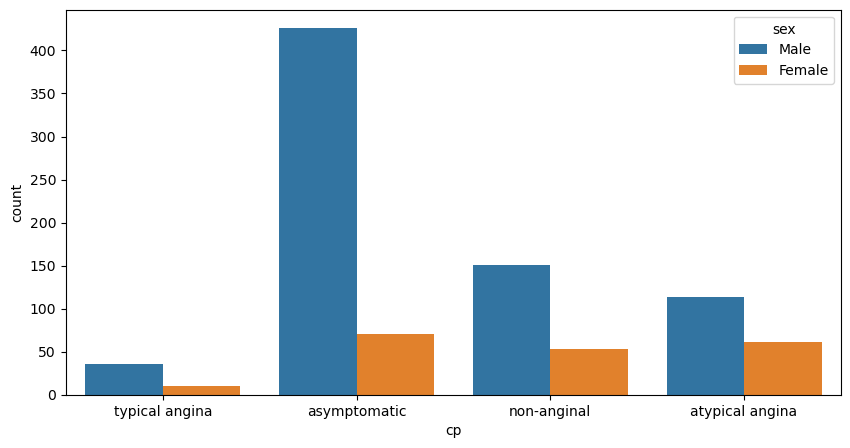

In [273]:
# Plot the cp column based on sex
plt.figure(figsize=(10, 5))
sns.countplot(df, x = 'cp', hue='sex')
plt.show()

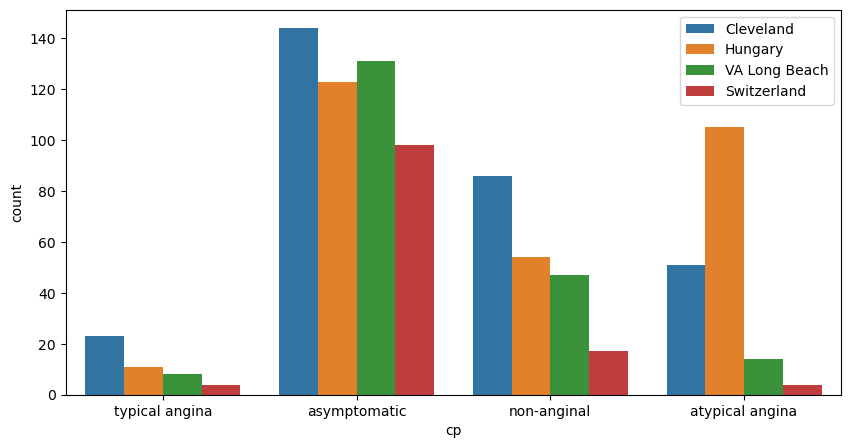

In [274]:
# Plot of cp based on dataset
plt.figure(figsize=(10, 5))
sns.countplot(df, x = 'cp', hue='dataset')
plt.legend(loc = 'upper right')
plt.show()

In [275]:
#5.trestbps (The person's resting blood pressure mm Hg) Column
df['trestbps'].describe()

count    920.000000
mean     131.995652
std       18.451300
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

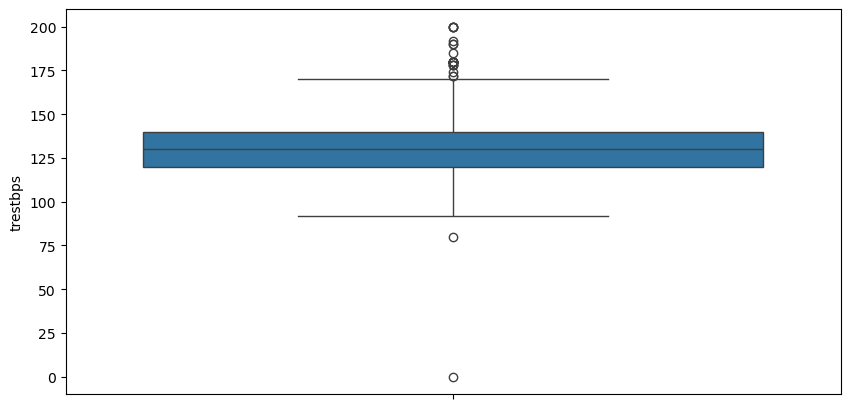

In [276]:
# Let's us plot a box plot and see the outliers in trestbps column
plt.figure(figsize=(10, 5))
sns.boxplot(df['trestbps'])
plt.show

In [277]:
# Let's check for the row that has 0 mm Hg
df[df['trestbps'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754.0,55.0,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.0,reversable defect,3


In [278]:
# Let's remove that row
df.drop(df[df['trestbps'] == 0].index, inplace = True)

In [279]:
# Now, let'c check the shape of dataset
print(df.shape)

(919, 16)


<function matplotlib.pyplot.show(close=None, block=None)>

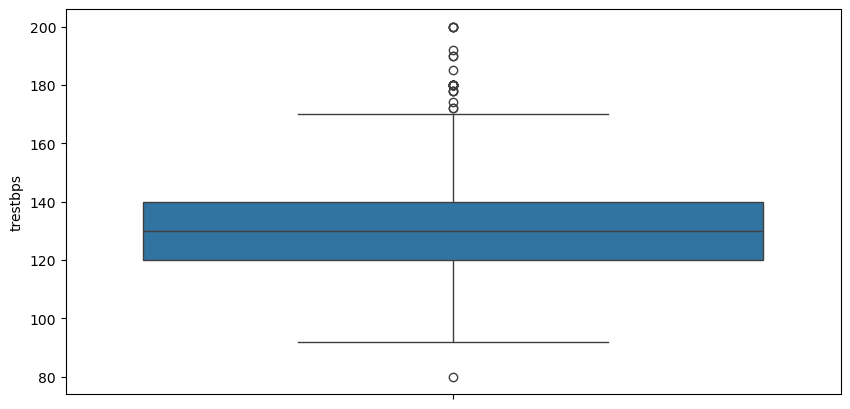

In [280]:
plt.figure(figsize=(10, 5))
sns.boxplot(df['trestbps'])
plt.show

Mean: 132.139281828074
Median: 130.0
Mode: 130.0


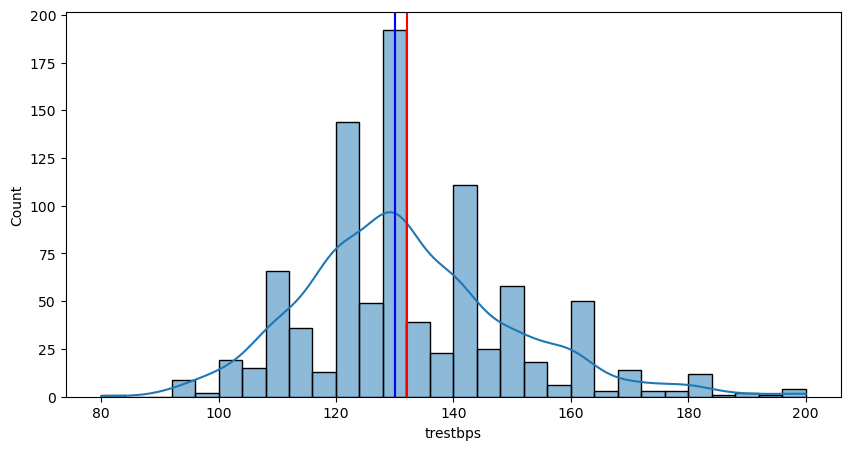

In [281]:
# Let's see the distribution of trestbps
plt.figure(figsize=(10, 5))

sns.histplot(df['trestbps'], kde = True)
plt.axvline(df['trestbps'].mean(), color='red')
plt.axvline(df['trestbps'].median(), color='green')
plt.axvline(df['trestbps'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['trestbps'].mean())
print('Median:', df['trestbps'].median())
print('Mode:', df['trestbps'].mode()[0])

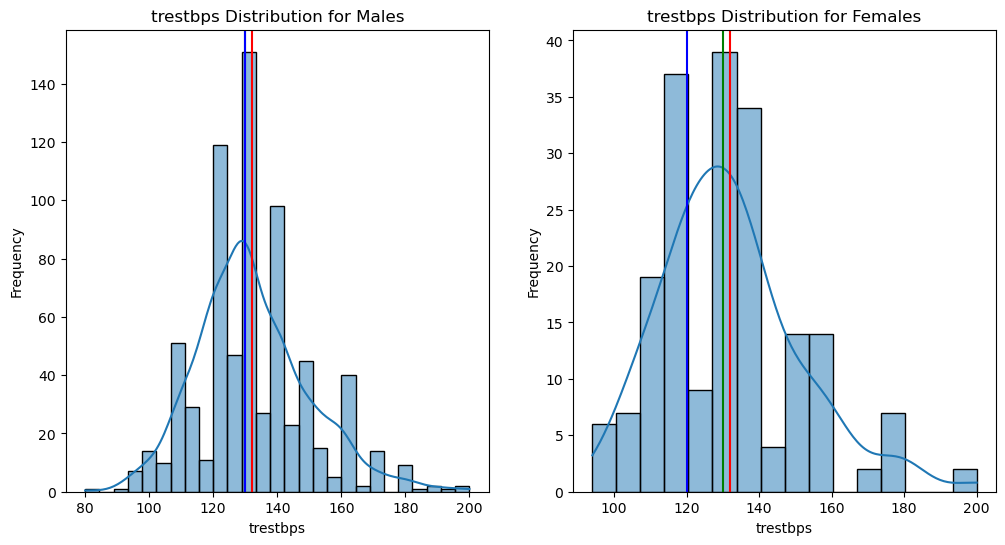

Mean trestbps of Males: 132.15724137931034
Median trestbps of Males: 130.0
Mode trestbps of Males: 130.0
Mean trestbps of Females: 132.0721649484536
Median trestbps of Females: 130.0
Mode trestbps of Females: 120.0


In [282]:
# Let's see the mean, median, mode of trestbps based on male and female seperately
# First extract the gender 
males = df[df['sex'] == 'Male']
females = df[df['sex'] == 'Female']

plt.figure(figsize=(12, 6))

# Plot the trestbps distribution for males and also plot the mean, median and mode for males trestbps
plt.subplot(1, 2, 1)
sns.histplot(males['trestbps'], kde = True)
plt.title('trestbps Distribution for Males')
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.axvline(males['trestbps'].mean(), color='red')
plt.axvline(males['trestbps'].median(), color='green')
plt.axvline(males['trestbps'].mode()[0], color='blue')

# Plot the trestbps distribution for females
plt.subplot(1, 2, 2)
sns.histplot(females['trestbps'], kde=True)
plt.title('trestbps Distribution for Females')
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.axvline(females['trestbps'].mean(), color='red')
plt.axvline(females['trestbps'].median(), color='green')
plt.axvline(females['trestbps'].mode()[0], color='blue')

plt.show()

# Print the value of mean, median and mode of trestbps column based on gender
print('Mean trestbps of Males:', males['trestbps'].mean())
print('Median trestbps of Males:', males['trestbps'].median())
print('Mode trestbps of Males:', males['trestbps'].mode()[0])



print('Mean trestbps of Females:', females['trestbps'].mean())
print('Median trestbps of Females:', females['trestbps'].median())
print('Mode trestbps of Females:', females['trestbps'].mode()[0])

In [283]:
# Make a plot of trestbps column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='trestbps', color='dataset')
fig.show()

In [284]:
#6.chol (Cholestoral level) Column
df['chol'].describe()



count    919.000000
mean     200.126224
std      108.899633
min        0.000000
25%      178.500000
50%      223.000000
75%      267.000000
max      603.000000
Name: chol, dtype: float64

Mean: 200.12622415669205
Median: 223.0
Mode: 0.0


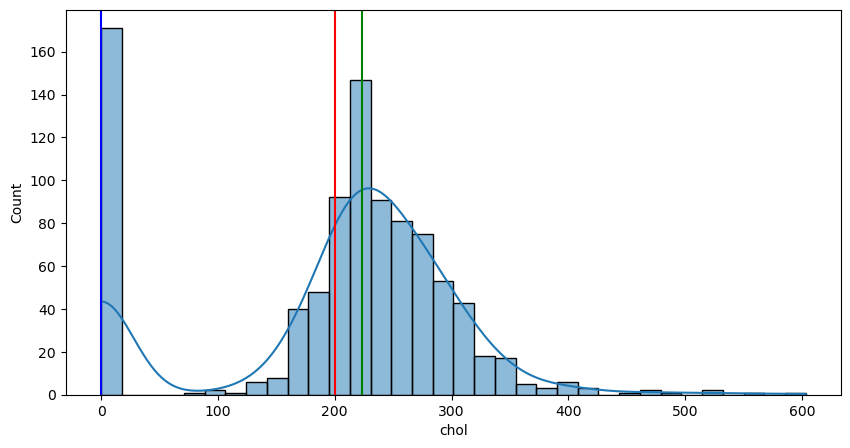

In [285]:
plt.figure(figsize=(10, 5))

sns.histplot(df, x = 'chol', kde = True)
plt.axvline(df['chol'].mean(), color='red')
plt.axvline(df['chol'].median(), color='green')
plt.axvline(df['chol'].mode()[0], color='blue')

# print the value of mean, median and mode of chol column
print('Mean:', df['chol'].mean())
print('Median:', df['chol'].median())
print('Mode:', df['chol'].mode()[0])

In [286]:
print(f"Average chol level is {round(df['chol'].mean(), 2)}")

Average chol level is 200.13


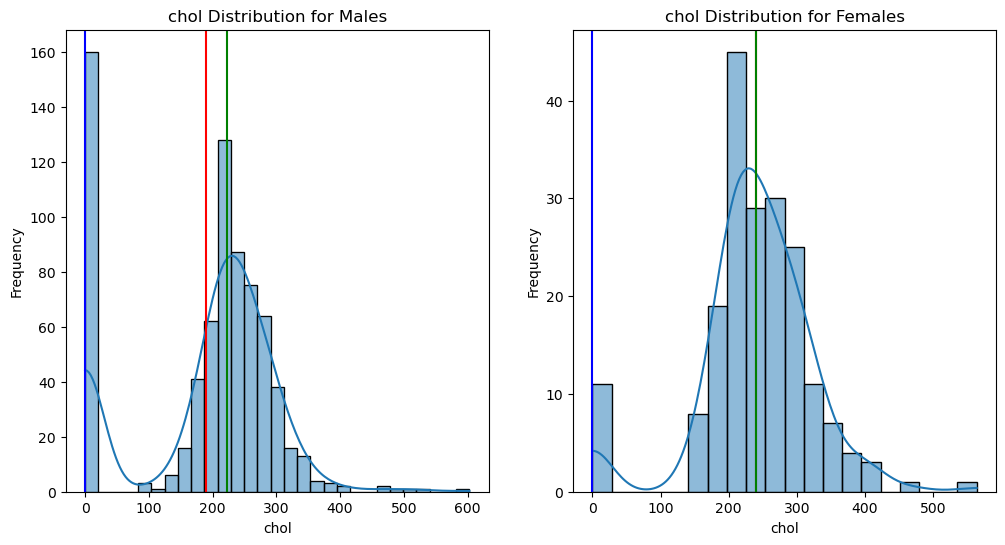

Mean chol of Males: 189.23862068965516
Median chol of Males: 222.0
Mode chol of Males: 0.0
                           
Mean chol of Females: 240.81443298969072
Median chol of Females: 240.5
Mode chol of Females: 0.0


In [287]:
# Let's see the mean, median, mode of chol based on male and female seperately
# First extract the gender 
males = df[df['sex'] == 'Male']
females = df[df['sex'] == 'Female']

plt.figure(figsize=(12, 6))

# Plot the chol distribution for males and also plot the mean, median and mode for males chol
plt.subplot(1, 2, 1)
sns.histplot(males['chol'], kde = True)
plt.title('chol Distribution for Males')
plt.xlabel('chol')
plt.ylabel('Frequency')
plt.axvline(males['chol'].mean(), color='red')
plt.axvline(males['chol'].median(), color='green')
plt.axvline(males['chol'].mode()[0], color='blue')

# Plot the chol distribution for females
plt.subplot(1, 2, 2)
sns.histplot(females['chol'], kde=True)
plt.title('chol Distribution for Females')
plt.xlabel('chol')
plt.ylabel('Frequency')
plt.axvline(females['chol'].mean(), color='red')
plt.axvline(females['chol'].median(), color='green')
plt.axvline(females['chol'].mode()[0], color='blue')

plt.show()

# Print the value of mean, median and mode of chol column based on gender
print('Mean chol of Males:', males['chol'].mean())
print('Median chol of Males:', males['chol'].median())
print('Mode chol of Males:', males['chol'].mode()[0])

print("                           ")
print('Mean chol of Females:', females['chol'].mean())
print('Median chol of Females:', females['chol'].median())
print('Mode chol of Females:', females['chol'].mode()[0])

In [288]:
fig = px.histogram(df, x = 'chol', color = 'dataset')
fig.show()

In [289]:
#7. fbs (Fasting Blood Pressure) Column
# Let's see the fasing blood pressure
df['fbs'].value_counts()

False    781
True     138
Name: fbs, dtype: int64

In [290]:
# Let's see the fasing blood pressure based on sex
df.groupby('fbs')['sex'].value_counts()

fbs    sex   
False  Male      606
       Female    175
True   Male      119
       Female     19
Name: sex, dtype: int64

In [291]:
# Let's see fasting blood pressure based on sex
fig = px.histogram(df, x = 'sex', color='fbs')
fig.show()

In [292]:
#Based on the observation, it is apparent that 781 individuals possess a False value for 
#the fbs, indicating that they do not have a favorable sugar level. 
#Conversely, the 138 individuals with True values have a positive or appropriate sugar level.

In [293]:
#8. restecg Column
df['restecg'].value_counts()

normal              552
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

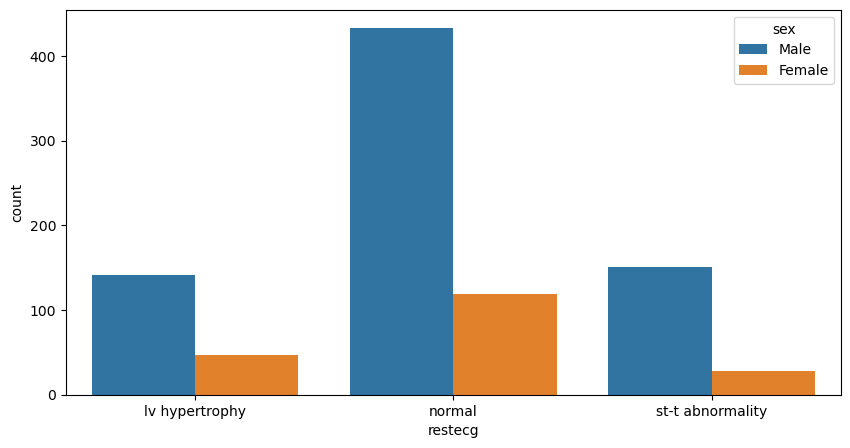

In [294]:
# Let's plot this
plt.figure(figsize=(10, 5))
           
sns.countplot(df,x=df['restecg'], hue='sex')
plt.show()
#Most of the patients have normal restecg.

In [295]:
# Let's see restecg based on dataset
fig = px.histogram(df, x = 'restecg', color='dataset')
fig.show()

In [296]:
#9. thalch (The person's maximum heart rate achieved) Column
df['thalch'].describe()

count    919.000000
mean     137.673558
std       25.152434
min       60.000000
25%      120.000000
50%      140.000000
75%      156.000000
max      202.000000
Name: thalch, dtype: float64

Mean: 137.67355821545158
Median: 140.0
Mode: 140.0


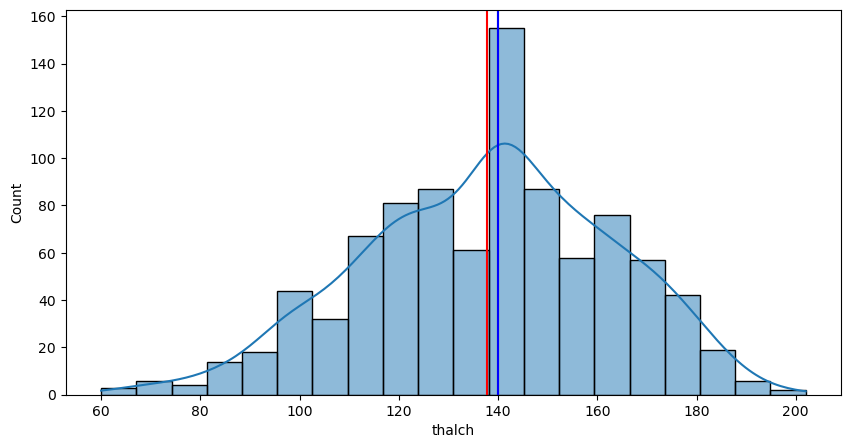

In [297]:
# Let's see tha maximum heart rate achieved thalch and its distribution in a plot
plt.figure(figsize=(10,5))

sns.histplot(df, x = df['thalch'], kde = True)
plt.axvline(df['thalch'].mean(), color='red')
plt.axvline(df['thalch'].median(), color='green')
plt.axvline(df['thalch'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['thalch'].mean())
print('Median:', df['thalch'].median())
print('Mode:', df['thalch'].mode()[0])

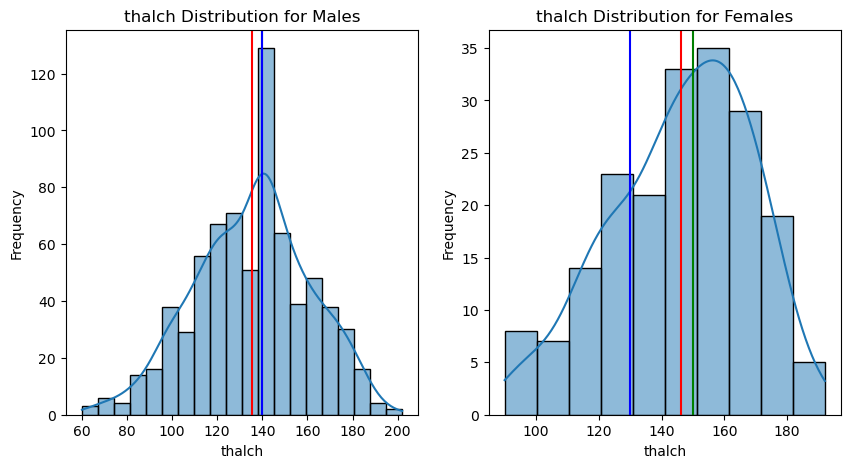

Mean thalch of Males: 135.39724137931034
Median thalch of Males: 140.0
Mode thalch of Males: 140.0

Mean thalch of Females: 146.18041237113403
Median thalch of Females: 150.0
Mode thalch of Females: 130.0


In [298]:
# Let's see the mean, median, mode of thalch based on male and female seperately
# First extract the gender 
males = df[df['sex'] == 'Male']
females = df[df['sex'] == 'Female']

plt.figure(figsize=(10, 5))

# Plot the thalch distribution for males and also plot the mean, median and mode for males thalch
plt.subplot(1, 2, 1)
sns.histplot(males['thalch'], kde = True)
plt.title('thalch Distribution for Males')
plt.xlabel('thalch')
plt.ylabel('Frequency')
plt.axvline(males['thalch'].mean(), color='red')
plt.axvline(males['thalch'].median(), color='green')
plt.axvline(males['thalch'].mode()[0], color='blue')

# Plot the thalch distribution for females
plt.subplot(1, 2, 2)
sns.histplot(females['thalch'], kde=True)
plt.title('thalch Distribution for Females')
plt.xlabel('thalch')
plt.ylabel('Frequency')
plt.axvline(females['thalch'].mean(), color='red')
plt.axvline(females['thalch'].median(), color='green')
plt.axvline(females['thalch'].mode()[0], color='blue')

plt.show()

# Print the value of mean, median and mode of thalch column based on gender
print('Mean thalch of Males:', males['thalch'].mean())
print('Median thalch of Males:', males['thalch'].median())
print('Mode thalch of Males:', males['thalch'].mode()[0])

print('')

print('Mean thalch of Females:', females['thalch'].mean())
print('Median thalch of Females:', females['thalch'].median())
print('Mode thalch of Females:', females['thalch'].mode()[0])

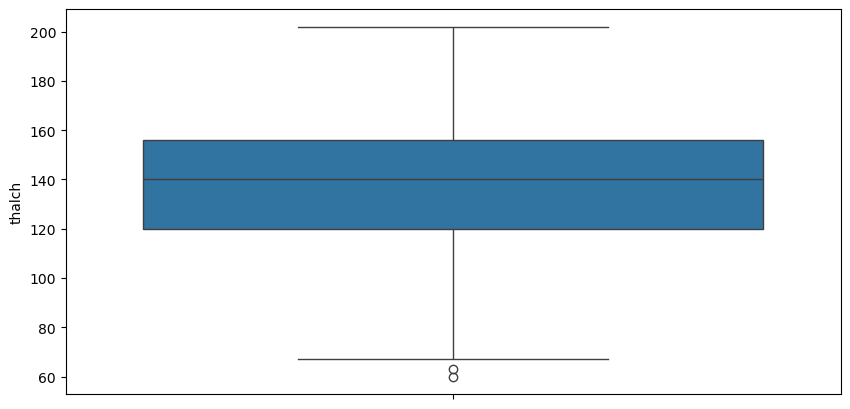

In [299]:
plt.figure(figsize=(10, 5))

sns.boxplot(y = df['thalch'])
plt.show()
#No outliers in the thalch column.

In [300]:
# Let's plot thalch based on gender
fig = px.histogram(df, x = 'thalch', color = 'sex')
fig.show()

In [301]:
# Let's plot thalch based on gender
fig = px.histogram(df, x = 'thalch', color = 'dataset')
fig.show()

In [302]:
#10. exang (Exercise-Induced Angina) Column

df['exang'].value_counts()

False    582
True     337
Name: exang, dtype: int64

In [303]:
# Let's plot 
fig = px.histogram(df, x='exang')
fig.show()

In [304]:
# Let's groupby exang based on sex
df.groupby('exang')['sex'].value_counts()

exang  sex   
False  Male      431
       Female    151
True   Male      294
       Female     43
Name: sex, dtype: int64

In [305]:
#11. oldpeak Column
# Let's check statistical summary of oldpeak 
df['oldpeak'].describe()

count    919.000000
mean       0.852557
std        1.058409
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

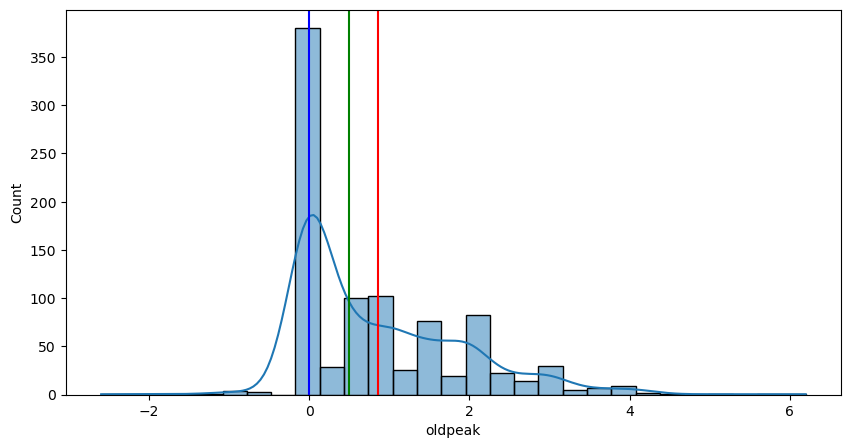

In [306]:
# Let's check the distribution of oldpeak column
plt.figure(figsize=(10, 5))

sns.histplot(df,x=df['oldpeak'], kde=True)
plt.axvline(df['oldpeak'].mean(), color='red')
plt.axvline(df['oldpeak'].median(), color='green')
plt.axvline(df['oldpeak'].mode()[0], color='blue')

In [307]:
#12. slope Column

df['slope'].value_counts()

flat           618
upsloping      274
downsloping     27
Name: slope, dtype: int64

In [308]:
df.groupby('slope')['restecg'].value_counts()

slope        restecg         
downsloping  lv hypertrophy       12
             normal               11
             st-t abnormality      4
flat         normal              358
             st-t abnormality    150
             lv hypertrophy      110
upsloping    normal              183
             lv hypertrophy       66
             st-t abnormality     25
Name: restecg, dtype: int64

In [309]:
#13. ca (Number of Major Vessels Colored by Fluoroscopy) Column

# Let's check the value counts of ca 

df['ca'].value_counts()

0.0    720
1.0    114
2.0     63
3.0     22
Name: ca, dtype: int64

In [310]:
#14. thal (Thalassemia Type) Column
# Let's check the value counts
df['thal'].value_counts()

normal               489
reversable defect    391
fixed defect          39
Name: thal, dtype: int64

In [311]:
# Let's plot this
fig = px.histogram(df, x = 'thal')
fig.show()

In [312]:
#15. num (Heart Disease Presence) Column

df['num'].value_counts()

0    411
1    265
2    109
3    106
4     28
Name: num, dtype: int64

In [313]:
# Let's plot this
fig = px.histogram(df, x = 'num')
fig.show()

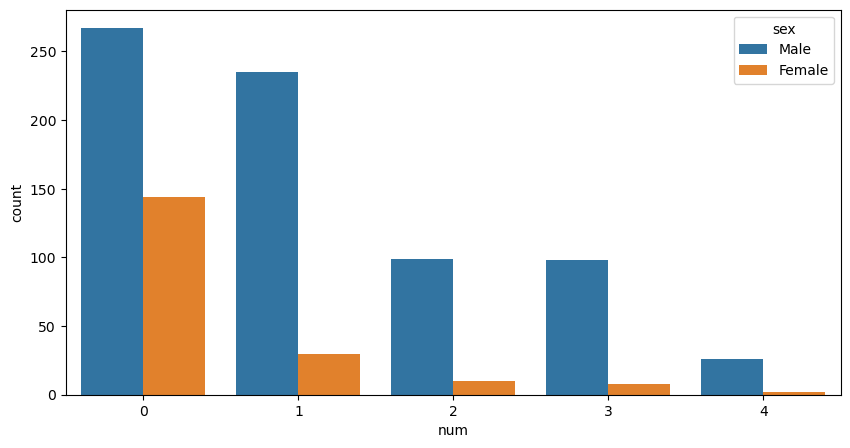

In [314]:
# Let's see heart disease based on sex
plt.figure(figsize=(10, 5))

sns.countplot(df, x = df['num'], hue = 'sex')
plt.show()

In [315]:
# Let's see the value counts of heart disease in each dataset
df.groupby(df['num'])[['dataset']].value_counts()

num  dataset      
0    Hungary          187
     Cleveland        165
     VA Long Beach     51
     Switzerland        8
1    Hungary          106
     VA Long Beach     56
     Cleveland         55
     Switzerland       48
2    VA Long Beach     41
     Cleveland         36
     Switzerland       32
3    VA Long Beach     41
     Cleveland         35
     Switzerland       30
4    Cleveland         13
     VA Long Beach     10
     Switzerland        5
dtype: int64

In [316]:
# Let's see heart disease based on dataset
fig = px.histogram(df, x = 'num', color='dataset')
fig.show()

In [317]:
#There are 411 individuals with no heart disease, with the majority, 187, originating from Hungary.
#Among those with stage 1 disease (265 individuals), the highest number, 106, is from Hungary.
#Individuals with stage 2 disease(109 in total) are most prevalent in VA Long Beach, with 41 cases.
#For stage 3 disease (28 individuals), Cleveland leads with 13 cases.

#The Targeted column is num which is the predicted attribute. 
#We will use this column to predict the heart disease. 
#The unique values in this column are: [0,1,2,3,4], which states that there 
#are 5 types of heart diseases.

# 0 = no heart disease.

# 1 = Mild Heart Disease types.

# 2 = Moderate Heart Disease type.

# 3 =  Severe Heart Disease type.

# 4 =  Critical Heart Disease type.

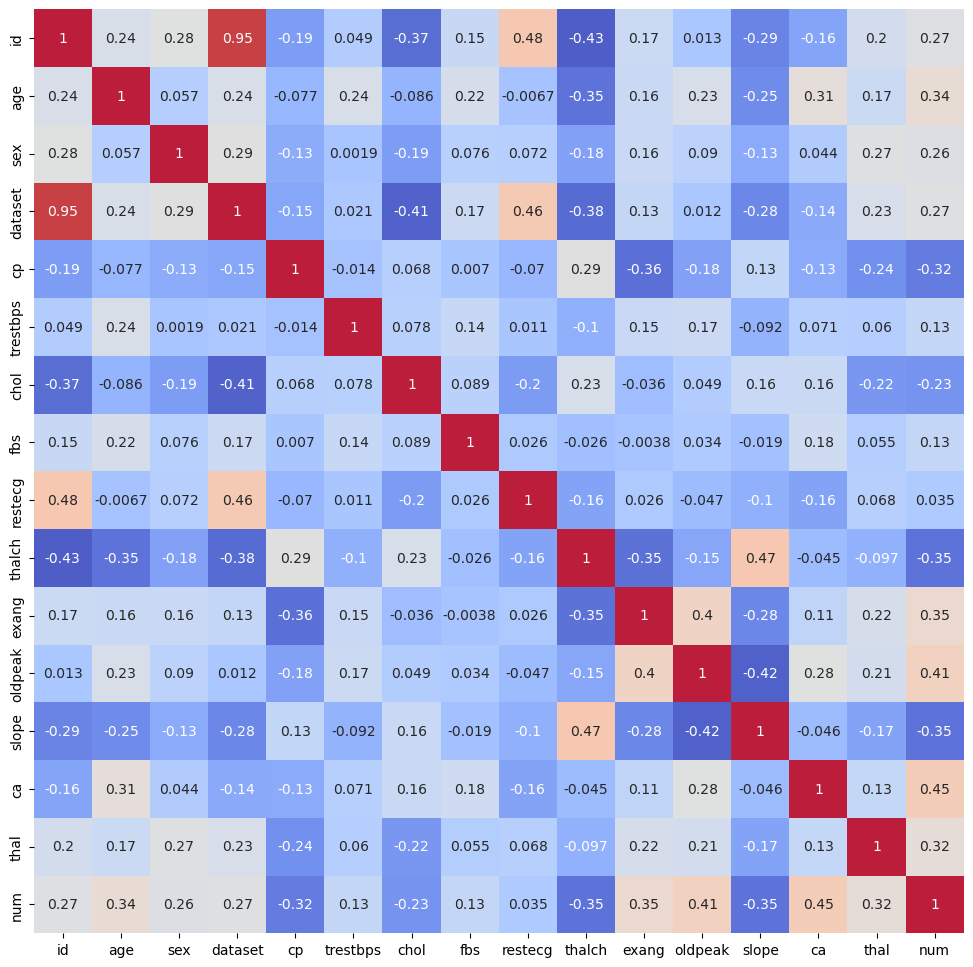

In [318]:
#7. Exploraing the corelation between the columns

# Let's Plot correlation matrix after converting categorical columns to numerical

# Convert categorical columns to numerical using LabelEncoder
df2 = df.copy()
for col in df2.columns:
    if df2[col].dtype == 'object' or df2[col].dtype == 'bool':
          df2[col] = LabelEncoder().fit_transform(df2[col])

correlation_matrix = df2.corr()
sort_corr_features = correlation_matrix.index 

# Plot the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(df2[sort_corr_features].corr(), annot=True, cmap='coolwarm', alpha = 0.9, cbar = False)
plt.show()

In [319]:
#High positive coefficients (e.g., ca, oldpeak, age, exang) suggest that as these feature 
#values increase, the likelihood of an increase in num is higher, indicating a strong direct 
#relationship. Conversely, high negative coefficients (e.g., cp, slope, thalach) suggest that 
#as these features increase, the value of num is likely to decrease, indicating a strong inverse 
#relationship.


In [320]:
#8. Scale the numerical columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    float64
 1   age       919 non-null    float64
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    bool   
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    bool   
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: bool(2), float64(7), int64(1), object(6)
memory usage: 109.5+ KB


In [321]:
# Let's scale the numerical columns using MinMaxScalar
columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

for col in columns_to_scale:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[[col]])

In [322]:
df.sample(4)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
72,73.0,0.693878,Male,Cleveland,asymptomatic,0.333333,0.442786,False,normal,0.274648,True,0.500000,flat,2.0,reversable defect,1
121,122.0,0.714286,Female,Cleveland,asymptomatic,0.583333,0.674959,False,lv hypertrophy,0.661972,False,0.750000,flat,3.0,reversable defect,4
301,302.0,0.591837,Female,Cleveland,atypical angina,0.416667,0.391376,False,lv hypertrophy,0.802817,False,0.295455,flat,1.0,normal,1
312,313.0,0.122449,Female,Hungary,atypical angina,0.416667,0.266998,False,normal,0.915493,False,0.295455,upsloping,0.0,normal,0


In [323]:
#9.Encoding the categorical columns using LabelEncoder

lab_enc = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bool' or df[col].dtype == 'category':
        df[col] = lab_enc.fit_transform(df[col])

In [324]:
df.sample(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
236,237.0,0.571429,1,0,0,0.416667,0.469320,1,0,0.302817,1,0.477273,0,0.0,2,2
486,487.0,0.653061,1,1,2,0.333333,0.407960,0,0,0.528169,0,0.295455,1,0.0,1,0
484,485.0,0.632653,1,1,2,0.833333,0.353234,0,1,0.281690,0,0.295455,1,0.0,2,0
800,801.0,0.612245,1,3,0,0.433333,0.759536,1,1,0.063380,0,0.409091,1,0.0,1,0
883,884.0,0.836735,1,3,0,0.416667,0.479270,1,2,0.563380,0,0.352273,1,2.0,2,3
647,648.0,0.530612,1,2,0,0.833333,0.000000,0,1,0.633803,0,0.465909,1,0.0,2,1
506,507.0,0.367347,1,1,0,0.333333,0.459370,0,1,0.457746,1,0.409091,1,0.0,2,1
366,367.0,0.306122,0,1,1,0.333333,0.441128,0,1,0.408451,0,0.295455,1,0.0,1,0
833,834.0,0.897959,1,3,0,0.416667,0.349917,0,1,0.563380,0,0.352273,1,0.0,2,1
205,206.0,0.346939,1,0,0,0.516667,0.512438,0,0,0.612676,1,0.295455,1,3.0,2,3


In [388]:
#10. Machine Learning models building

# Let's split the data into Features (X) and Labels (y)
X = df.drop(['id', 'num'], axis = 1)
y = df['num']

In [397]:
# Split the into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [398]:
# Let's check the shape of X_train and X_test data
print(f"The shape of train data is {X_train.shape} anad test data is {X_test.shape}")

The shape of train data is (643, 14) anad test data is (276, 14)


In [399]:
# creating function to find best model:
def find_best_model(X, y, X_test, y_test):
    # Creating the global variables that we will use inside and the outside of the function as well:
    global y_pred,best_model_name
    np.random.seed(42)
    models = {
        'LogisticRegression': (LogisticRegression(random_state=42), {}),

        'SVC': (SVC(random_state=42), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}),

        'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10], 'splitter': ['best', 'random']}),

        'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]}),

        'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 80, 2), 'weights': ['uniform', 'distance']}),

        'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'n_estimators': [10, 100, 1000]}),

        'XGBClassifier': (XGBClassifier(random_state=42), {'n_estimators': [10, 100, 1000], 'learning_rate': [0.1, 0.01, 0.001]}),

        'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]}),
    }

    best_model_name = None
    best_accuracy = 0.0 

    for name, (model, params) in models.items():
        try:
            grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
            grid_search.fit(X, y)

            # You need to evaluate the model on the test set to get accuracy
            y_pred = grid_search.best_estimator_.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Print the performance metrics
            print("Model:", name)
            print("Cross-validation Accuracy:", grid_search.best_score_)
            print("Test Accuracy:", accuracy)
            print("\n_______________________________________________________________\n")

            # Check if the current model has the best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model_name = name
        except Exception as e:
            print(f"Error for model {name}: {e}")

    # Retrieve the best model
    print("Best Model:", best_model_name)
    print('Test Accuracy of the Best Model:', (best_accuracy)*100)

In [400]:
%%time
# Using the function: 
find_best_model(X, y, X_test, y_test)

Model: LogisticRegression
Cross-validation Accuracy: 0.5133998574483251
Test Accuracy: 0.6376811594202898

_______________________________________________________________

Model: SVC
Cross-validation Accuracy: 0.5526847232121644
Test Accuracy: 0.6159420289855072

_______________________________________________________________

Model: DecisionTreeClassifier
Cross-validation Accuracy: 0.47637205987170345
Test Accuracy: 0.8876811594202898

_______________________________________________________________

Model: RandomForestClassifier
Cross-validation Accuracy: 0.5298289379900214
Test Accuracy: 0.6992753623188406

_______________________________________________________________

Model: KNeighborsClassifier
Cross-validation Accuracy: 0.548360655737705
Test Accuracy: 0.6086956521739131

_______________________________________________________________

Model: GradientBoostingClassifier
Cross-validation Accuracy: 0.46227726300784033
Test Accuracy: 0.6847826086956522

_____________________________

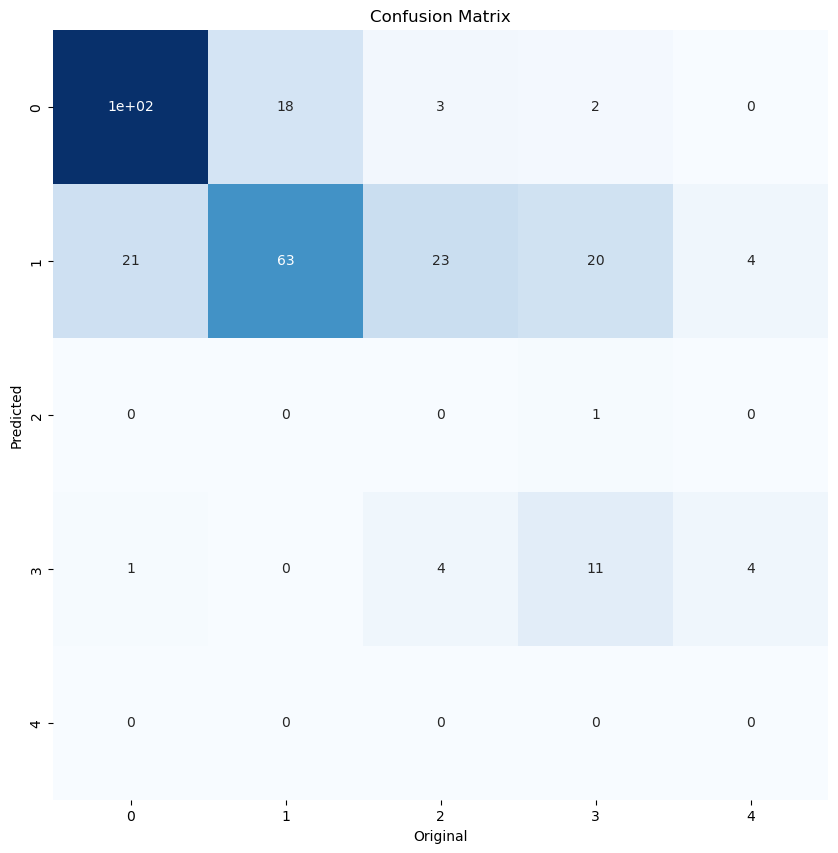

In [401]:
# Plotting the confusion matrix

plt.figure(figsize=(10, 10))

sns.heatmap(confusion_matrix(y_pred, y_test), cmap = 'Blues', annot=True, cbar=False)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

In [402]:
import pickle
                        
pickle.dump(best_model_name, open('heart_prediction_model_best', 'wb'))

In [403]:
model = pickle.load(open('heart_prediction_model_best','rb'))

In [404]:
model

'DecisionTreeClassifier'